## H + CX Gates
H + CX gates help to make an entanglement between two qubits.

In [6]:
import numpy as np

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

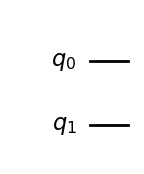

In [7]:
qc = QuantumCircuit(2)
qc.draw(output='mpl')

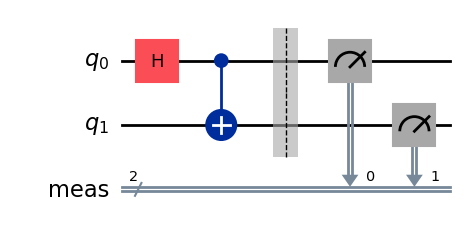

In [8]:
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw(output='mpl')

### Run on an ideal simulator

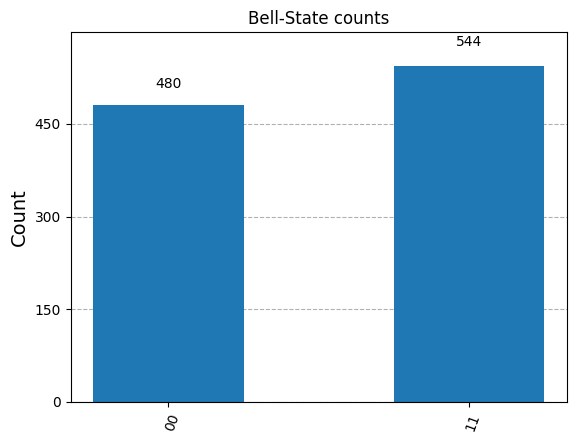

In [9]:
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='Bell-State counts')

In [16]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

### Run on a normal simulator

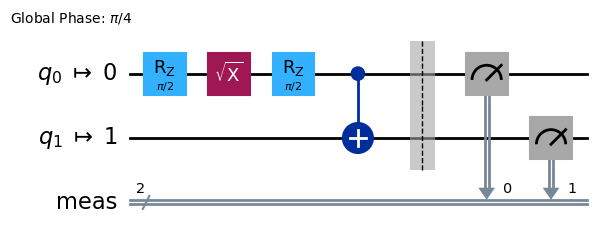

In [22]:
fake_manila = FakeManilaV2()

sampler = Sampler(fake_manila)

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=fake_manila, optimization_level=1)
isa_circuit = pm.run(qc)

isa_circuit.draw('mpl', idle_wires=False)

In [23]:
# Run calculation
job = sampler.run([isa_circuit])

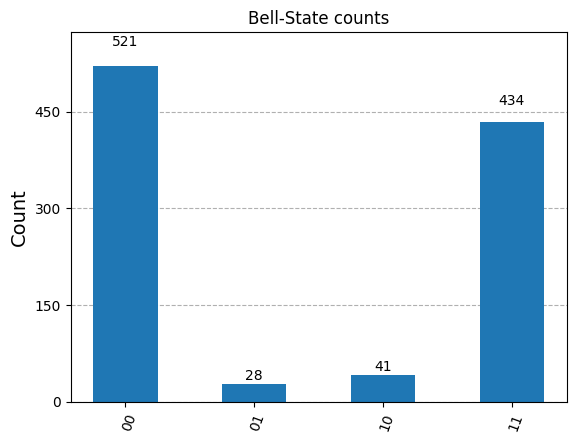

In [24]:
result = job.result()
counts = result[0].data.meas.get_counts()

plot_histogram(counts, title='Bell-State counts')

In [25]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

### Run on IBM quantum computer

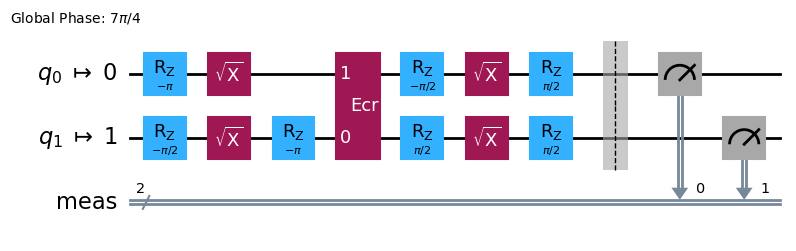

In [26]:
# If you did not previously save your credentials, use the following line instead:
service = QiskitRuntimeService(channel="ibm_quantum", token="")

backend = service.least_busy(simulator=False, operational=True)

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

isa_circuit.draw('mpl', idle_wires=False)

In [27]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [28]:
service = QiskitRuntimeService(channel="ibm_quantum", token="")

backend = service.least_busy(simulator=False, operational=True)

job = backend.run(isa_circuit)

C:\Users\disha\AppData\Local\Temp\ipykernel_20484\2580330380.py:5: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime.
  job = backend.run(isa_circuit)


In [30]:
job.job_id()

'ctcdmwvakxxg008kbq2g'

In [31]:
result = job.result()

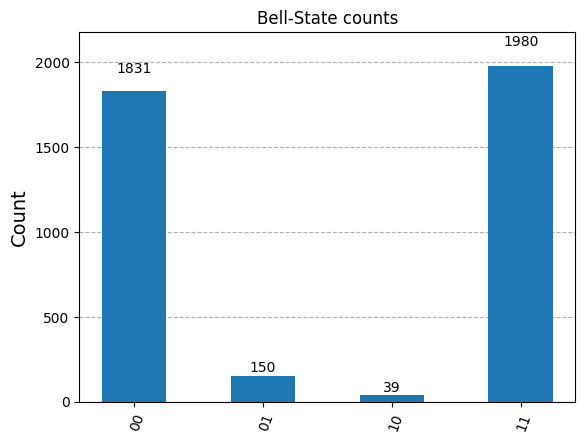

In [32]:
counts = result.get_counts(isa_circuit)
plot_histogram(counts, title='Bell-State counts')

In [33]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2

In [34]:
service = QiskitRuntimeService(channel="ibm_quantum", token="")

backend = service.least_busy(simulator=False, operational=True)

sampler = SamplerV2(backend)

job = sampler.run([isa_circuit])

In [35]:
job.job_id()

'ctcdvbdy6ybg008tj540'

In [62]:
result = job.result()

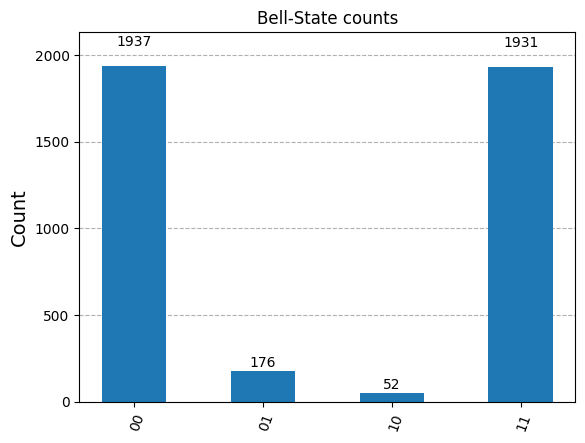

In [63]:
counts = result[0].data.meas.get_counts()

plot_histogram(counts, title='Bell-State counts')

## Swap Gate

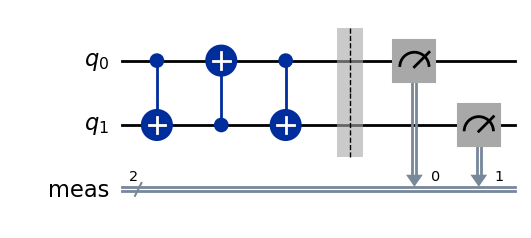

In [54]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
qc.measure_all()
qc.draw(output='mpl')

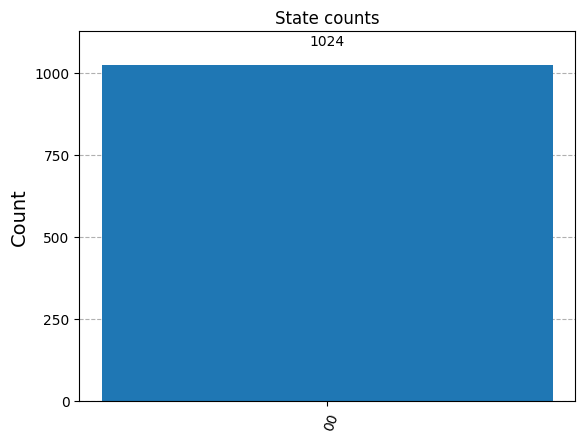

In [55]:
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='State counts')